In [1]:
import numpy as np
import urllib.request
# url with dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
# download the file
raw_data = urllib.request.urlopen(url)
# load the CSV file as a numpy matrix
dataset = np.loadtxt(raw_data, delimiter=",")
# separate the data from the target attributes
X = dataset[:,0:7]
y = dataset[:,8]
X

array([[   6.   ,  148.   ,   72.   , ...,    0.   ,   33.6  ,    0.627],
       [   1.   ,   85.   ,   66.   , ...,    0.   ,   26.6  ,    0.351],
       [   8.   ,  183.   ,   64.   , ...,    0.   ,   23.3  ,    0.672],
       ..., 
       [   5.   ,  121.   ,   72.   , ...,  112.   ,   26.2  ,    0.245],
       [   1.   ,  126.   ,   60.   , ...,    0.   ,   30.1  ,    0.349],
       [   1.   ,   93.   ,   70.   , ...,    0.   ,   30.4  ,    0.315]])

In [2]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
# fit a CART model to the data
model = DecisionTreeClassifier()
model.fit(X, y)
print(model)
# make predictions
expected = y
predicted = model.predict(X)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       500
        1.0       1.00      1.00      1.00       268

avg / total       1.00      1.00      1.00       768

[[500   0]
 [  0 268]]


## 下面对决策树进行全方位的案例解析 直到明白透彻

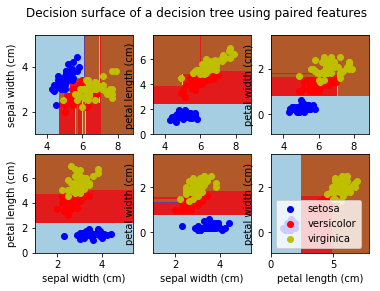

In [5]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# 参数
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# 鸢尾花数据加载
iris = load_iris()

# 鸢尾花数据有4个属性，取两两属性为一组，遍历
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # 每次取两个属性的数据
    X = iris.data[:, pair]
    y = iris.target

    # 训练分类器
    clf = DecisionTreeClassifier().fit(X, y)

    # 绘制决策边界，共2行3列6个子图，每组属性画一个图
    plt.subplot(2, 3, pairidx + 1)

    # 生成坐标矩阵数据
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    # 使用分类器计算每个坐标点的分类，并绘制分类结果矩阵的等高线
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    # 使用属性特征名作为横纵坐标名
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # 绘制训练数据点，并用不同颜色区分
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

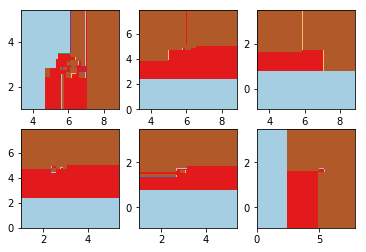

b
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], dtype=int64),)
r
(array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], dtype=int64),)
y
(array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149], dtype=int64),)


In [177]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
# 参数
n_classes = 3
plot_colors = "bry"
plot_step = 0.02
# 鸢尾花数据有4个属性，取两两属性为一组，遍历
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
# 每次取两个属性的数据
    X = iris.data[:, pair]
    y = iris.target

    # 训练分类器
    clf = DecisionTreeClassifier().fit(X, y)

    # 绘制决策边界，共2行3列6个子图，每组属性画一个图
    plt.subplot(2, 3, pairidx + 1)

    # 生成坐标矩阵数据
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    # 使用分类器计算每个坐标点的分类，并绘制分类结果矩阵的等高线
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
# plt.show()
for i,color in zip(range(3),'bry'):
    idx = np.where(y==i)
    print(color)
    print(idx)
    plt.scatter(X[idx,0],X[idx,1],c=color,label='xxxx',cmap=)


### meshgrid 讲解(https://zhuanlan.zhihu.com/p/29663486)
### reval()讲解（http://blog.csdn.net/liuweiyuxiang/article/details/78220080）
### np.c\_ 讲解(https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html)
### contour函数讲解（http://blog.csdn.net/lanchunhui/article/details/70495353）


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       500
        1.0       1.00      1.00      1.00       268

avg / total       1.00      1.00      1.00       768

[[500   0]
 [  0 268]]


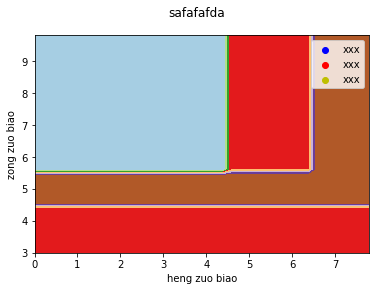

In [194]:
#下面是自己随机写的另外一个例子
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
x1 = np.array([1,2,3,4,2,7,6])
y1 = np.array([4,5,6,5,4,9,8])
xy = np.c_[x1,y1]
tagy = [1,2,0,2,1,2,1]
clf = DecisionTreeClassifier().fit(xy,tagy)
plt.subplot(111)
clf.predict(xy)
print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected,predicted))
#  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
# cs = plt.contour(x1,y1,xy,cmap=plt.cm.gray)
x1x,y1y = np.meshgrid(np.arange(0,8,0.2),np.arange(3,10,0.2))
ZZ = clf.predict(np.c_[x1x.ravel(),y1y.ravel()])
ZZ = ZZ.reshape(x1x.shape)
# xy = xy.reshape(x1x.shape)
cs = plt.contourf(x1x,y1y,ZZ,cmap=plt.cm.Paired)
plt.xlabel(u"heng zuo biao")
plt.ylabel(u"zong zuo biao")
for i,color in zip(range(3),'bry'):
    idxa = np.where(tagy==i)
    plt.scatter(x1x[idxa,0],x1x[idxa,1],c=color,label="xxx",cmap=plt.cm.Paired)
    
plt.axis('tight')
plt.suptitle('safafafda')
plt.legend()
plt.show()
# X[]
# xy = xy.reshape(x1.shape)

### zip函数的讲解（https://www.cnblogs.com/frydsh/archive/2012/07/10/2585370.html）
### np.where()讲解（http://blog.csdn.net/lanchunhui/article/details/49489205）

In [164]:
a = 'y'
for i,color in zip(range(7),'bryeyrsy'):
    print(color)
    t = np.where(a == color)
    print(t)

b
(array([], dtype=int64),)
r
(array([], dtype=int64),)
y
(array([0], dtype=int64),)
e
(array([], dtype=int64),)
y
(array([0], dtype=int64),)
r
(array([], dtype=int64),)
s
(array([], dtype=int64),)


In [165]:
np.where([[0, 1], [1, 0]])

(array([0, 1], dtype=int64), array([1, 0], dtype=int64))

In [169]:
np.where([[0, 1],[1, 2]])

(array([0, 1, 1], dtype=int64), array([1, 0, 1], dtype=int64))

In [175]:
x = np.arange(9.).reshape(3, 3)
 np.where( x > 5 )
print(x)
np.where( x > 5 )
#返回值 分别为行列index

[[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]]


(array([2, 2, 2], dtype=int64), array([0, 1, 2], dtype=int64))